# Brain Tumor Detection
Binary Classification: CNN to classigy into Y or N 
Feature Extraction & Clustering: NN to extract features from MRI scans and then apply algorithms to find patterns

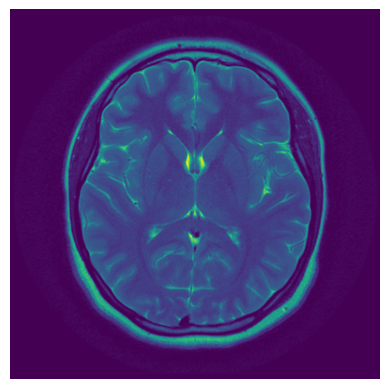

In [1]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# List of URLs of the images
image_urls = [
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/1%20no.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/10%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/11%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/12%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/13%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/14%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/15%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/17%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/18%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/19%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/20%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/21%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/22%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/23%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/24%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/25%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/26%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/27%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/28%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/29%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/3%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/30%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/31%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/32%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/33%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/34%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/35%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/36%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/37%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/38%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/39%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/4%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/41%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/42%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/43%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/44no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/45%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/46%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/47%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/48%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/49%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/5%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/50%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/6%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/7%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/8%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/9%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N1.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N1.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N11.jpg' ,
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N16.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N19.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N20.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N2.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N22.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N26.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N3.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N5.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N6.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No11.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No12.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No13.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No14.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No16.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No18.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No19.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No20.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No22.jpg',
    
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%201.jpg',
    
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2010.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%20100.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%202.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%203.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%204.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%205.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%206.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%207.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%208.jpg',
    
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2089.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%209.jpg',
    
    
    
    
    
    
    
    
    
    
    
    
    
]

# Function to display an image from a URL
def display_image_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Check for errors
    image_bytes = BytesIO(response.content)
    image = Image.open(image_bytes)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
'''
# Display all images
for url in image_urls:
    display_image_from_url(url)
'''